In [521]:
# This program is to plot the alpha diversity of the Chu dataset
import scipy as sc
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
import matplotlib.lines as mlines
import scipy
import statsmodels.api as sm

### Setting File Paths

In [522]:
data_dir = "/u/home/j/jjeon6/FMT-evolution/Jooeun/Chu_2021/metadata/"
metadata_path = "%s%s" % (data_dir, "beta_df.csv")
metadatawithdonor = "%s%s" % (data_dir, "organized_metadata.csv")
relab_dir = "/u/project/ngarud/Garud_lab/metagenomic_fastq_files/Chu_2021/"
relab_path = "%s%s" % (relab_dir, "merged_data/species/relative_abundance.txt.bz2") 

In [523]:
folder_path = '/u/home/j/jjeon6/FMT-evolution/Jooeun/Calculated_Pi_MinCoverage4/'
file_names = os.listdir(folder_path)

zip_files = list(filter(lambda file_name: file_name.endswith('Summary_Stats_Sidekick.csv.bz2'), file_names))
pidf = pd.DataFrame(columns=['species','Genomewide_pi','Genomewide_pi_variable_sites','Mean_depth','n_total_loci'])

for x in zip_files:
    file_path = "%s%s" % (folder_path, x)
    tempdf = pd.read_csv(file_path)
    new_row = {
    'species': x,
    'Genomewide_pi': tempdf.iloc[0, 1],
    'Genomewide_pi_variable_sites': tempdf.iloc[0, 2],
    'Mean_depth': tempdf.iloc[0, 3],
    'n_total_loci': tempdf.iloc[0, 4]
    }
    pidf = pidf.append(new_row, ignore_index=True)
pidf['run_accession'] = pidf['species'].str.split('SampleID1_').str[-1].str.strip()
pidf['run_accession'] = pidf['run_accession'].str.split('_Pi', expand=True)[0].str.strip()
pidf['species'] = pidf['species'].str.replace('Strain_', '')
pidf['species'] = pidf['species'].str.split('_SampleID', expand=True)[0].str.strip()
pidf

species  Genomewide_pi  \
0           Adlercreutzia_equolifaciens_60310       0.000200   
1               Akkermansia_muciniphila_55290       0.000027   
2               Akkermansia_muciniphila_55290       0.000025   
3               Akkermansia_muciniphila_55290       0.000018   
4                  Alistipes_putredinis_61533       0.000170   
5              Actinomyces_urogenitalis_53864       0.000087   
6                  Alistipes_putredinis_61533       0.000026   
7                  Alistipes_putredinis_61533       0.000055   
8                 Alistipes_onderdonkii_55464       0.004878   
9                  Bacteroides_fragilis_54507       0.000000   
10                  Anaerostipes_hadrus_55206       0.001642   
11                  Anaerostipes_hadrus_55206       0.000033   
12                 Alistipes_putredinis_61533       0.000064   
13                 Bacteroides_fragilis_54507       0.000051   
14                 Alistipes_putredinis_61533       0.000064   
15                 Alistipes_putredinis_61533       0.000093   
16                 Alistipes_putredinis_61533       0.000034   
17              Akkermansia_muciniphila_55290       0.000020   
18                 Alistipes_putredinis_61533       0.000136   
19                  Anaerostipes_hadrus_55206       0.000176   
20                  Anaerostipes_hadrus_55206       0.000135   
21                 Bacteroides_fragilis_54507       0.000061   
22              Akkermansia_muciniphila_55290       0.000030   
23            Acidaminococcus_intestini_54097       0.000340   
24                 Alistipes_putredinis_61533       0.000089   
25                 Alistipes_putredinis_61533       0.000069   
26                 Bacteroides_fragilis_54507       0.000018   
27                 Alistipes_putredinis_61533       0.000179   
28                 Alistipes_putredinis_61533       0.000327   
29                 Alistipes_putredinis_61533       0.000036   
30                 Alistipes_putredinis_61533       0.000030   
31                 Alistipes_putredinis_61533       0.000044   
32                 Alistipes_putredinis_61533       0.000061   
33                 Alistipes_putredinis_61533       0.000054   
34              Akkermansia_muciniphila_55290       0.000056   
35                 Alistipes_finegoldii_56071       0.000067   
36              Akkermansia_muciniphila_55290       0.000032   
37                 Alistipes_putredinis_61533       0.000077   
38                 Alistipes_putredinis_61533       0.000065   
39                 Alistipes_putredinis_61533       0.000298   
40                Alistipes_onderdonkii_55464       0.001013   
41                Alistipes_onderdonkii_55464       0.004692   
42                Alistipes_onderdonkii_55464       0.001193   
43                 Alistipes_putredinis_61533       0.000047   
44                Bacteroides_coprocola_61586       0.000024   
45                 Alistipes_putredinis_61533       0.000077   
46                 Alistipes_putredinis_61533       0.000047   
47                 Alistipes_putredinis_61533       0.000033   
48                 Alistipes_finegoldii_56071       0.000072   
49                 Alistipes_putredinis_61533       0.000032   
50                 Alistipes_putredinis_61533       0.000056   
51                 Alistipes_finegoldii_56071       0.000033   
52                   Bacteroides_ovatus_58035       0.001246   
53                 Alistipes_finegoldii_56071       0.000054   
54                 Alistipes_finegoldii_56071       0.000121   
55                  Anaerostipes_hadrus_55206       0.002657   
56                 Alistipes_putredinis_61533       0.000050   
57                 Alistipes_putredinis_61533       0.000078   
58                 Alistipes_finegoldii_56071       0.000087   
59                 Alistipes_putredinis_61533       0.000055   
60                Alistipes_onderdonkii_55464       0.000082   
61                 Alistipes_putredinis_61533       0.000130   
62    

### Loading in Data

In [524]:
pd.set_option('display.max_rows', None)
metadata_df = pd.read_csv(metadata_path, sep = ",")
metadata_df = metadata_df.drop(['fmt_induction', 'fmt_current', 'fmt_past','reads_16s'], axis=1)
#Removing the columns we are not going to use for this analysis

In [525]:
fullmetadata = pd.read_csv('/u/home/j/jjeon6/FMT-evolution/Jooeun/Chu_2021/metadata/organized_metadata.csv', sep = ",")

In [526]:
relab_df = pd.read_csv(relab_path, sep = "\t")

### Calculating alpha diversity

In [527]:
alphas = [] # a list to store all the alpha values
samples = metadata_df['run_accession'] # converting all the sample ids into a list to help looping
for sample in samples:
    # getting the relative abundaces for each sample
    abundance_vec = relab_df[sample] 
    sample_abundances = [x for x in abundance_vec if x != 0]
    # calculating alpha and adding to list
    alpha = -np.sum(pd.Series(sample_abundances)*np.log(pd.Series(sample_abundances)))
    alphas.append(alpha)
metadata_df['alpha_diversity'] = alphas
pd.set_option('display.max_rows', None)

### Plotting Alpha Diversity

In [528]:
# Donor, before FMT, after FMT...
# Placebo vs treatment
# responder vs nonresponder
# 4 plots?

In [529]:
mask = fullmetadata['patient'].str.contains('Donor')

# Use this mask to filter the DataFrame
filtered_df = fullmetadata[mask]

# Group the filtered DataFrame and find the index of the row with the maximum 'reads_mgx' in each group
donors_df = filtered_df.loc[filtered_df.groupby(['patient'])['reads_mgx'].idxmax()].reset_index(drop=True)

donors_df

sample_id   patient run_accession  days_past_fmt  approx_wk pill_group  \
0  donor_am-0169  Donor am    SRR9092031            NaN        NaN        NaN   
1  donor_az-0031  Donor az    SRR9091975            NaN        NaN        NaN   

  fmt_induction fmt_current fmt_past responder_fmt  reads_16s  reads_mgx  
0           NaN         NaN      NaN           NaN     374376   79743900  
1           NaN         NaN      NaN           NaN     190876  136813040

In [530]:
#Leaving only the maximum number of reads for each week

df = metadata_df.loc[metadata_df.groupby(['approx_wk', 'patient'])['reads_mgx'].idxmax()].reset_index(drop=True)
df = df.sort_values(by=['patient', 'approx_wk'])

In [531]:
df["category"] = np.nan
df["category"] = np.where(df.patient.str.contains("FMT"), "FMT",
                   np.where(df.patient.str.contains("Placebo"), "Placebo",""))

In [532]:
df

sample_id    patient run_accession  days_past_fmt  approx_wk  \
0             03-128      FMT A    SRR9092165             -8         -1   
12            03-147      FMT A    SRR9092166             -1          0   
23      BB0000001305      FMT A    SRR9092157              3          1   
50        FMTA_week4      FMT A    SRR9092158             29          4   
61      BB0000001317      FMT A    SRR9092032             38          5   
72      BB0000001328      FMT A    SRR9092035             45          6   
80      BB0000001316      FMT A    SRR9092034             52          7   
92      BB0000001358      FMT A    SRR9092037             59          8   
103     BB0000001348      FMT A    SRR9092036             66          9   
113     BB0000001362      FMT A    SRR9092039             73         10   
120     BB0000001351      FMT A    SRR9092038             80         11   
130      FMTA_week12      FMT A    SRR9092041             85         12   
139      FMTA_week18      FMT A    SRR9092040            126         18   
1        FMTE_screen      FMT E    SRR9092139             -6         -1   
13            03-371      FMT E    SRR9092134             -1          0   
24            03-194      FMT E    SRR9092135              5          1   
34            03-122      FMT E    SRR9092132             11          2   
41            03-240      FMT E    SRR9092133             19          3   
51        FMTE_week4      FMT E    SRR9092123             28          4   
62            03-157      FMT E    SRR9092121             34          5   
73            03-201      FMT E    SRR9092120             40          6   
81            03-130      FMT E    SRR9092127             47          7   
93            03-168      FMT E    SRR9092126             54          8   
104           03-158      FMT E    SRR9092125             61          9   
114           03-176      FMT E    SRR9092124             69         10   
121           03-156      FMT E    SRR9092129             75         11   
131      FMTE_week12      FMT E    SRR9092128             85         12   
140      FMTE_week18      FMT E    SRR9091977            126         18   
148     BB0000001271      FMT E    SRR9092086            131         19   
152     BB0000001301      FMT E    SRR9092097            138         20   
156     BB0000001293      FMT E    SRR9091972            147         21   
2       BB0000001353      FMT F    SRR9092013             -8         -1   
14      BB0000001339      FMT F    SRR9091980             -2          0   
42      BB0000001272      FMT F    SRR9091981             20          3   
52        FMTF_week4      FMT F    SRR9092043             29          4   
63      BB0000001360      FMT F    SRR9092044             35          5   
74      BB0000001359      FMT F    SRR9092045             40          6   
82      BB0000001324      FMT F    SRR9092046             52          7   
94      BB0000001330      FMT F    SRR9092047             54          8   
105     BB0000001335      FMT F    SRR9092130             61          9   
132      FMTF_week12      FMT F    SRR9091961             86         12   
141      FMTF_week18      FMT F    SRR9092081            127         18   
160     BB0000001344      FMT F    SRR9092080            158         22   
3             03-227      FMT N    SRR9092059             -7         -1   
15            03-255      FMT N    SRR9092074             -1          0   
25            03-136      FMT N    SRR9091952              5          1   
35            03-311      FMT N    SRR9092062             12          2   
43            03-211      FMT N    SRR9092063             21          3   
53            03-198      FMT N    SRR9092064             27          4   
64            03-226      FMT N    SRR9092084             35          5   
75            03-254      FMT N    SRR9092085             40          6   
83            03-252      FMT N    SRR9091957             48          7   
95            03-310      FMT N    S

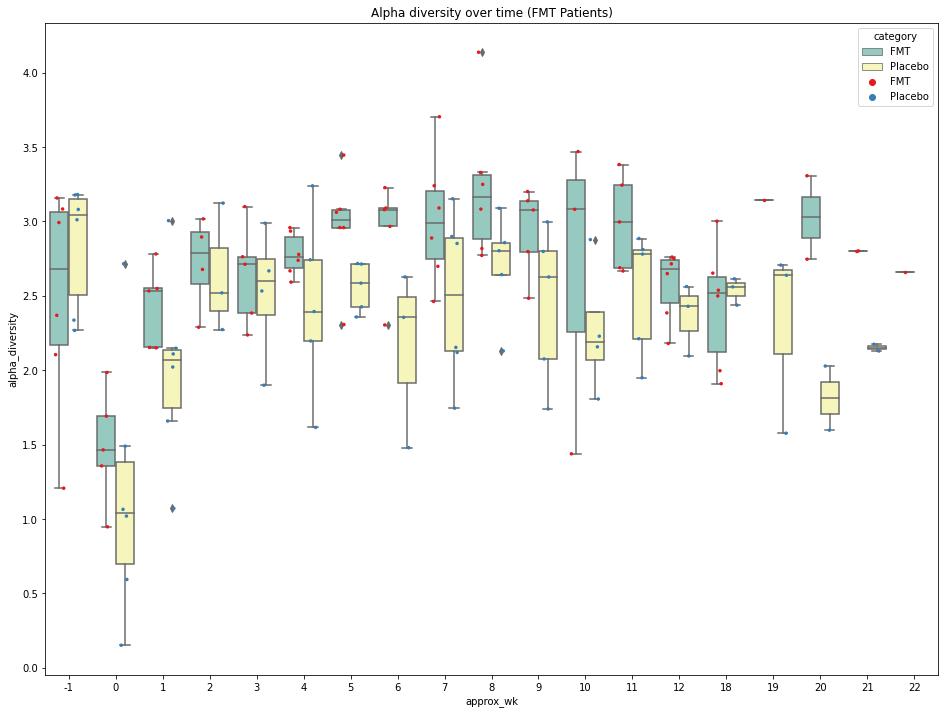

In [533]:
plt.figure(figsize=(16, 12))


# Create a boxplot
sns.boxplot(x='approx_wk', y='alpha_diversity', hue= 'category', data=df, palette='Set3')

# Overlay a scatterplot on the boxplot
sns.stripplot(x='approx_wk', y='alpha_diversity', hue= 'category', data=df, jitter=0.2, size=3.5, palette='Set1', dodge =True)

plt.title("Alpha diversity over time (FMT Patients)")
# Show the plot
plt.show()

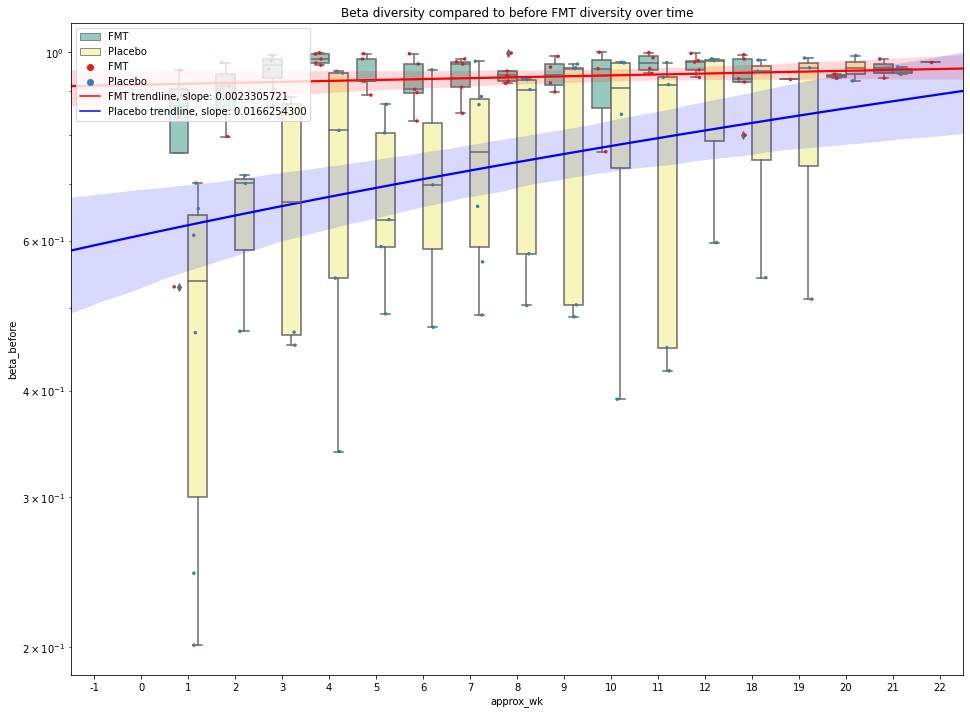

In [534]:
plt.figure(figsize=(16, 12))

# Create a boxplot
ax=sns.boxplot(x='approx_wk', y='beta_before', hue= 'category', data=df, palette='Set3')

# Overlay a scatterplot on the boxplot
sns.stripplot(x='approx_wk', y='beta_before', hue= 'category', data=df, jitter=0.2, size=3.5, palette='Set1', dodge =True)

# Get the handles and labels for the original legend
orig_handle, orig_label = ax.get_legend_handles_labels()

# Define colors to be used for regression lines, you may want to match these with the colors used for each category.
colors = ['red', 'blue', 'green']

# Store legend handles (all the original legend parts)
legend_handles = orig_handle  

for i, category in enumerate(df['category'].unique()):
    # Create a subset of the data for the current category
    subset = df[df['category'] == category]
    subset = subset.dropna(subset=['approx_wk', 'beta_before'])
    sns.regplot(x='approx_wk', y='beta_before', data=subset, 
                scatter=False, ax=ax, color=colors[i], truncate=False)
    # Calculate the slope (and intercept) for this category
    slope, intercept = np.polyfit(subset['approx_wk'], subset['beta_before'], 1)
    # Create a legend entry for this category
    line = mlines.Line2D([], [], color=colors[i], 
                          label=f'{category} trendline, slope: {slope:.10f}')
    legend_handles.append(line)

# Create a new legend with the original parts and the new line
plt.legend(handles=legend_handles, loc='upper left')

ax.set_yscale('log')
plt.title("Beta diversity compared to before FMT diversity over time")

# Show the plot
plt.show()

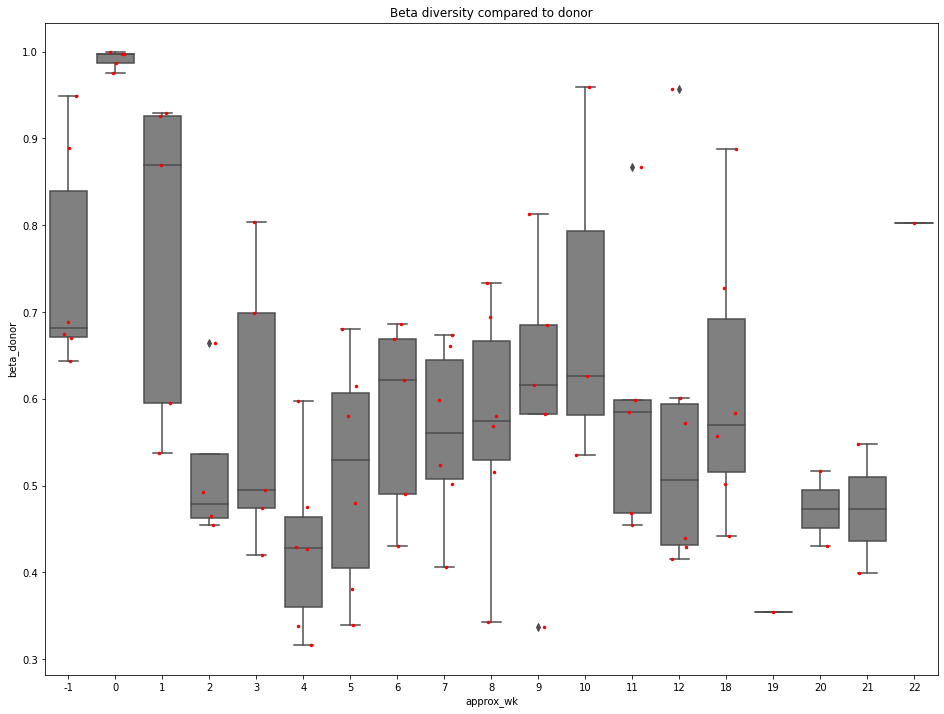

In [535]:
plt.figure(figsize=(16, 12))


# Create a boxplot
sns.boxplot(x='approx_wk', y='beta_donor', data=df, color='gray')

# Overlay a scatterplot on the boxplot
sns.stripplot(x='approx_wk', y='beta_donor', data=df, jitter=0.2, size=3.5, dodge =True, color='red')

# sns.regplot(x = "approx_wk", y = "beta_donor", data = df)


plt.title("Beta diversity compared to donor")
# Show the plot
plt.show()

### Change here for donor vs patient comparison

In [536]:
joined_donors_df = donors_df.merge(pidf, on='run_accession')
joined_donors_df["pi"] = np.nan

def check_value(x):
    if x > 0.001:
        return 'greater'
    elif x < 0.001:
        return 'less'
    else:
        return 'between'

joined_donors_df['pi'] = joined_donors_df['Genomewide_pi'].apply(check_value)

In [537]:
joined_df = df.merge(pidf, on='run_accession')

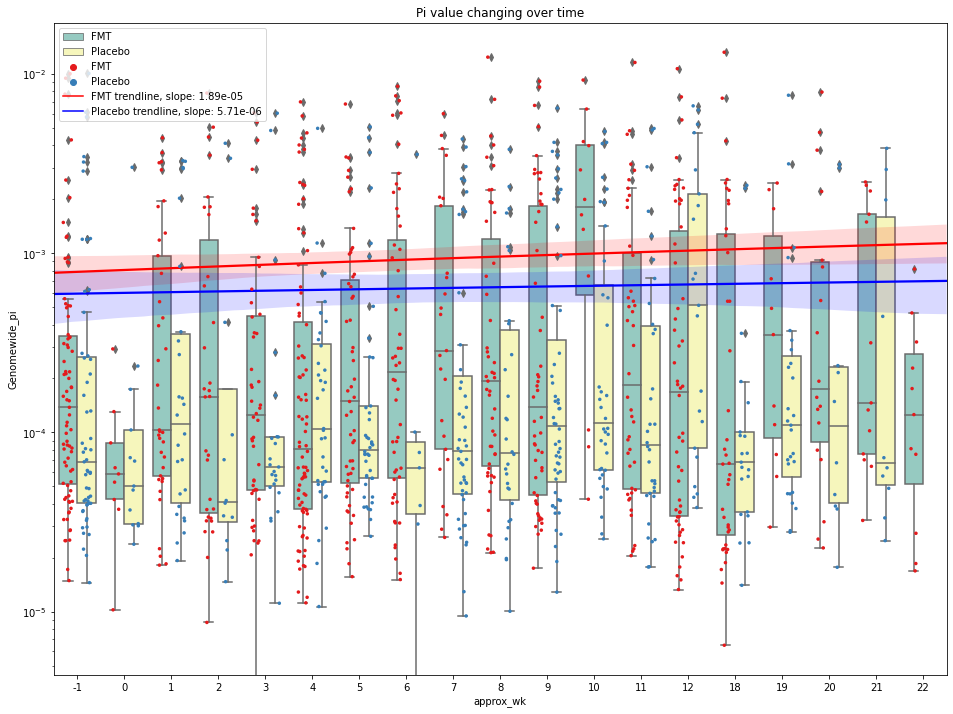

In [538]:
plt.figure(figsize=(16, 12))

# Create a boxplot
ax=sns.boxplot(x='approx_wk', y='Genomewide_pi', hue= 'category', data=joined_df, palette='Set3')

# Overlay a scatterplot on the boxplot
sns.stripplot(x='approx_wk', y='Genomewide_pi', hue= 'category', data=joined_df, jitter=0.2, size=3.5, palette='Set1', dodge =True)

# Get the handles and labels for the original legend
orig_handle, orig_label = ax.get_legend_handles_labels()

# Define colors to be used for regression lines, you may want to match these with the colors used for each category.
colors = ['red', 'blue', 'green']

# Store legend handles (all the original legend parts)
legend_handles = orig_handle  

for i, category in enumerate(joined_df['category'].unique()):
    # Create a subset of the data for the current category
    subset = joined_df[joined_df['category'] == category]
    sns.regplot(x='approx_wk', y='Genomewide_pi', data=subset, 
                scatter=False, ax=ax, color=colors[i], truncate=False)
    # Calculate the slope (and intercept) for this category
    slope, intercept = np.polyfit(subset['approx_wk'], subset['Genomewide_pi'], 1)
    # Create a legend entry for this category
    line = mlines.Line2D([], [], color=colors[i], 
                          label=f'{category} trendline, slope: {slope:.2e}')
    legend_handles.append(line)

# Create a new legend with the original parts and the new line
plt.legend(handles=legend_handles, loc='upper left')

ax.set_yscale('log')
plt.title("Pi value changing over time")

# Show the plot
plt.show()

### Change here to change patient_before vs after comparison

In [539]:
joined_df["pi"] = np.nan

def check_value(x):
    if x > 0.001:
        return 'greater'
    elif x < 0.001:
        return 'less'
    else:
        return 'between'

joined_df['pi'] = joined_df['Genomewide_pi'].apply(check_value)

In [540]:
donor_underdf = joined_donors_df[(joined_donors_df['pi'] == 'less')]
patient_overdf = joined_df[(joined_df['pi'] == 'greater') & (joined_df['approx_wk'] == -1)]
donor_overdf = joined_donors_df[(joined_donors_df['pi'] == 'greater')]
patient_underdf = joined_df[(joined_df['pi'] == 'less') & (joined_df['approx_wk'] == -1)]

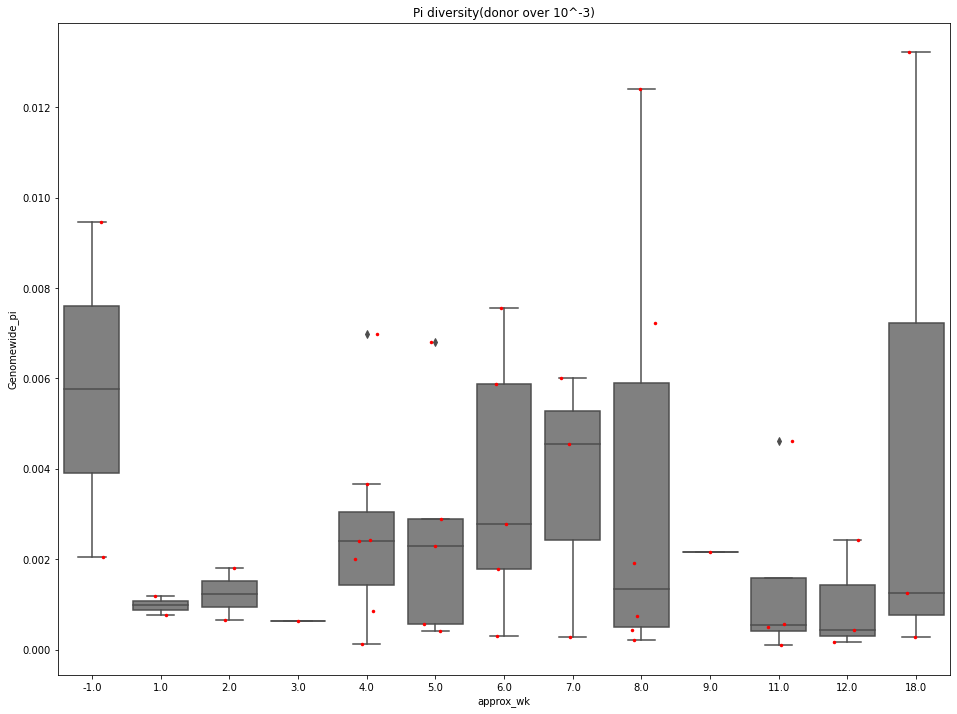

In [541]:
donor_overdf2 = pd.DataFrame()
for x in range(len(donor_overdf)):
    for y in range(len(joined_df)):
        if donor_overdf.iat[x, donor_overdf.columns.get_loc('run_accession')] == (joined_df.iat[y, joined_df.columns.get_loc('donor_accession')]) and donor_overdf.iat[x, donor_overdf.columns.get_loc('species')] == (joined_df.iat[y, joined_df.columns.get_loc('species')]):
            row = joined_df.loc[y]
            donor_overdf2 = donor_overdf2.append(row)
            
plt.figure(figsize=(16, 12))


# Create a boxplot
sns.boxplot(x='approx_wk', y='Genomewide_pi', data=donor_overdf2, color='gray')

# Overlay a scatterplot on the boxplot
sns.stripplot(x='approx_wk', y='Genomewide_pi', data=donor_overdf2, jitter=0.2, size=3.5, dodge =True, color='red')




plt.title("Pi diversity(donor over 10^-3)")
# Show the plot
plt.show()

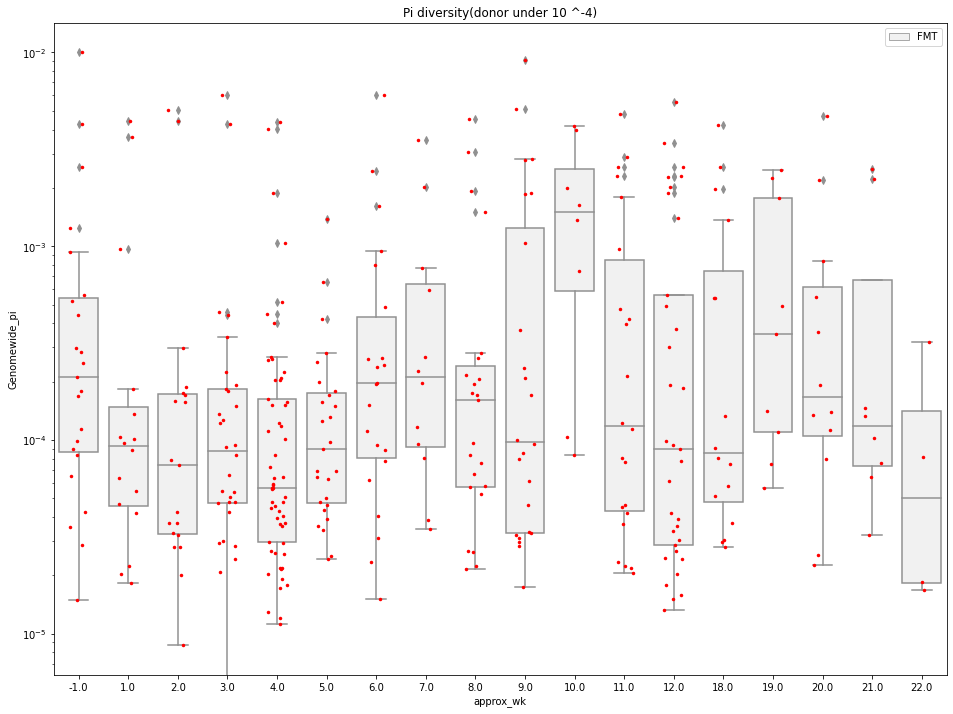

In [542]:
donor_underdf2 = pd.DataFrame()
for x in range(len(donor_underdf)):
    for y in range(len(joined_df)):
        if donor_underdf.iat[x, donor_underdf.columns.get_loc('run_accession')] == (joined_df.iat[y, joined_df.columns.get_loc('donor_accession')]) and donor_underdf.iat[x, donor_underdf.columns.get_loc('species')] == (joined_df.iat[y, joined_df.columns.get_loc('species')]):
            row = joined_df.loc[y]
            donor_underdf2 = donor_underdf2.append(row)

plt.figure(figsize=(16, 12))


# Create a boxplot
ax=sns.boxplot(x='approx_wk', y='Genomewide_pi', data=donor_underdf2,hue = 'category', color='gray')

# Overlay a scatterplot on the boxplot
sns.stripplot(x='approx_wk', y='Genomewide_pi', data=donor_underdf2, jitter=0.2, size=3.5, dodge =True, color='red')

ax.set_yscale('log')

plt.title("Pi diversity(donor under 10 ^-4)")
# Show the plot
plt.show()


In [543]:
patient_underdf2 = pd.DataFrame()
for x in range(len(patient_underdf)):
    for y in range(len(joined_df)):
        if patient_underdf.iat[x, patient_underdf.columns.get_loc('patient')] == (joined_df.iat[y, joined_df.columns.get_loc('patient')]) and patient_underdf.iat[x, patient_underdf.columns.get_loc('species')] == (joined_df.iat[y, joined_df.columns.get_loc('species')]):
            row = joined_df.loc[y]
            patient_underdf2 = patient_underdf2.append(row)

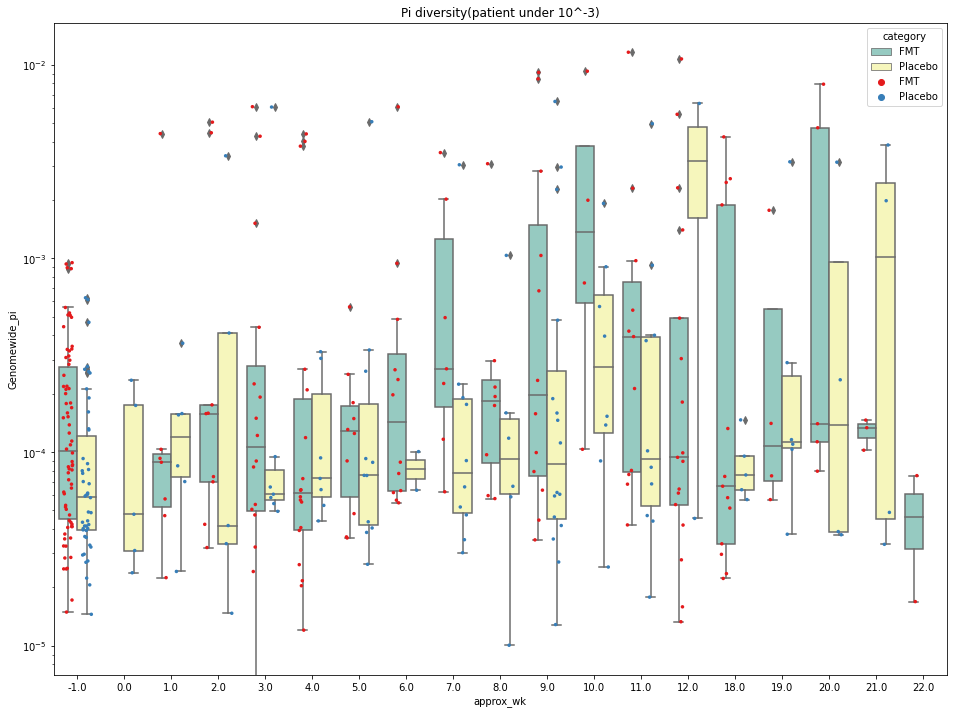

In [544]:
plt.figure(figsize=(16, 12))

hue_order = patient_underdf2['category'].sort_values().unique()
# Create a boxplot
ax=sns.boxplot(x='approx_wk', y='Genomewide_pi', data=patient_underdf2, hue = 'category', palette='Set3',hue_order=hue_order)

# Overlay a scatterplot on the boxplot
ax=sns.stripplot(x='approx_wk', y='Genomewide_pi', data=patient_underdf2, hue = 'category', jitter=0.2, size=3.5, dodge =True, palette='Set1', hue_order=hue_order)

ax.set_yscale('log')

plt.title("Pi diversity(patient under 10^-3)")
# Show the plot
plt.show()

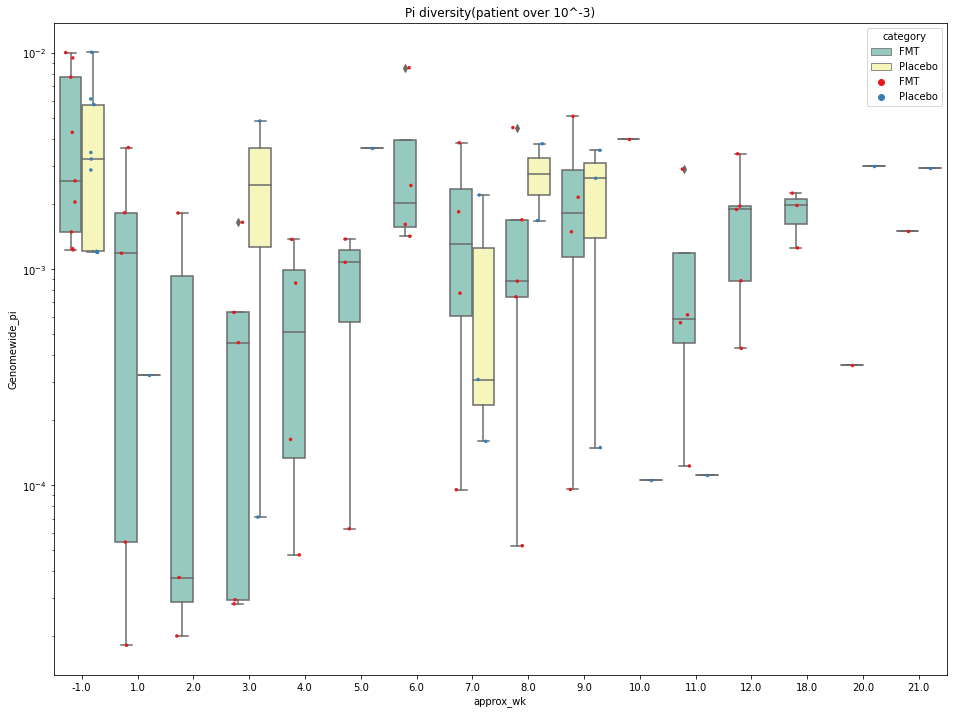

In [545]:
patient_overdf2 = pd.DataFrame()
for x in range(len(patient_overdf)):
    for y in range(len(joined_df)):
        if patient_overdf.iat[x, patient_overdf.columns.get_loc('patient')] == (joined_df.iat[y, joined_df.columns.get_loc('patient')]) and patient_overdf.iat[x, patient_overdf.columns.get_loc('species')] == (joined_df.iat[y, joined_df.columns.get_loc('species')]):
            row = joined_df.loc[y]
            patient_overdf2 = patient_overdf2.append(row)
            
plt.figure(figsize=(16, 12))

hue_order = patient_overdf2['category'].sort_values().unique()
# Create a boxplot
ax=sns.boxplot(x='approx_wk', y='Genomewide_pi', data=patient_overdf2, hue = 'category', palette='Set3',hue_order=hue_order)

# Overlay a scatterplot on the boxplot
ax=sns.stripplot(x='approx_wk', y='Genomewide_pi', data=patient_overdf2, hue = 'category', jitter=0.2, size=3.5, dodge =True, palette='Set1', hue_order=hue_order)

ax.set_yscale('log')

plt.title("Pi diversity(patient over 10^-3)")
# Show the plot
plt.show()

In [546]:
joined_df["delta_pi"] = np.nan
beforepatientdf = joined_df[(joined_df['approx_wk'] == -1.0) & (joined_df['category'] != 'Placebo')]
beforepatientdf

sample_id patient run_accession  days_past_fmt  approx_wk pill_group  \
0          03-128   FMT A    SRR9092165             -8         -1     switch   
1          03-128   FMT A    SRR9092165             -8         -1     switch   
2          03-128   FMT A    SRR9092165             -8         -1     switch   
3          03-128   FMT A    SRR9092165             -8         -1     switch   
4          03-128   FMT A    SRR9092165             -8         -1     switch   
5          03-128   FMT A    SRR9092165             -8         -1     switch   
6          03-128   FMT A    SRR9092165             -8         -1     switch   
7          03-128   FMT A    SRR9092165             -8         -1     switch   
8          03-128   FMT A    SRR9092165             -8         -1     switch   
9          03-128   FMT A    SRR9092165             -8         -1     switch   
96    FMTE_screen   FMT E    SRR9092139             -6         -1       same   
97    FMTE_screen   FMT E    SRR9092139             -6         -1       same   
98    FMTE_screen   FMT E    SRR9092139             -6         -1       same   
99    FMTE_screen   FMT E    SRR9092139             -6         -1       same   
100   FMTE_screen   FMT E    SRR9092139             -6         -1       same   
101   FMTE_screen   FMT E    SRR9092139             -6         -1       same   
102   FMTE_screen   FMT E    SRR9092139             -6         -1       same   
103   FMTE_screen   FMT E    SRR9092139             -6         -1       same   
275  BB0000001353   FMT F    SRR9092013             -8         -1     switch   
276  BB0000001353   FMT F    SRR9092013             -8         -1     switch   
277  BB0000001353   FMT F    SRR9092013             -8         -1     switch   
278  BB0000001353   FMT F    SRR9092013             -8         -1     switch   
279  BB0000001353   FMT F    SRR9092013             -8         -1     switch   
280  BB0000001353   FMT F    SRR9092013             -8         -1     switch   
281  BB0000001353   FMT F    SRR9092013             -8         -1     switch   
282  BB0000001353   FMT F    SRR9092013             -8         -1     switch   
380        03-227   FMT N    SRR9092059             -7         -1     switch   
381        03-227   FMT N    SRR9092059             -7         -1     switch   
382        03-227   FMT N    SRR9092059             -7         -1     switch   
383        03-227   FMT N    SRR9092059             -7         -1     switch   
384        03-227   FMT N    SRR9092059             -7         -1     switch   
385        03-227   FMT N    SRR9092059             -7         -1     switch   
386        03-227   FMT N    SRR9092059             -7         -1     switch   
387        03-227   FMT N    SRR9092059             -7         -1     switch   
388        03-227   FMT N    SRR9092059             -7         -1     switch   
389        03-227   FMT N    SRR9092059             -7         -1     switch   
390        03-227   FMT N    SRR9092059             -7         -1     switch   
391        03-227   FMT N    SRR9092059             -7         -1     switch   
392        03-227   FMT N    SRR9092059             -7         -1     switch   
393        03-227   FMT N    SRR9092059             -7         -1     switch   
394        03-227   FMT N    SRR9092059             -7         -1     switch   
395        03-227   FMT N    SRR9092059             -7         -1     switch   
396        03-227   FMT N    SRR9092059             -7         -1     switch   
397        03-227   FMT N    SRR9092059             -7         -1     switch   
398        03-227   FMT N    SRR9092059             -7         -1     switch   
399        03-227   FMT N    SRR9092059             -7         -1     switch   
400        03-227   FMT N    SRR9092059             -7         -1     switch   
498        03-129   FMT P    SRR9092112             -8         -1     switch   
499        03-129   FMT P    SRR9092112             -8         -1     switch   
500     

In [547]:
for x in range(len(joined_df)):
    for y in range(len(beforepatientdf)):
        if joined_df.iat[x, joined_df.columns.get_loc('patient')] == (beforepatientdf.iat[y, beforepatientdf.columns.get_loc('patient')]) and joined_df.iat[x, joined_df.columns.get_loc('species')] == (beforepatientdf.iat[y, beforepatientdf.columns.get_loc('species')]):
            joined_df.iat[x, joined_df.columns.get_loc('delta_pi')] = joined_df.iat[x, joined_df.columns.get_loc('Genomewide_pi')] - beforepatientdf.iat[y, beforepatientdf.columns.get_loc('Genomewide_pi')]
joined_df.loc[(joined_df['approx_wk'] == -1.0), 'delta_pi'] = np.nan

In [548]:
joined_df

sample_id    patient run_accession  days_past_fmt  approx_wk  \
0              03-128      FMT A    SRR9092165             -8         -1   
1              03-128      FMT A    SRR9092165             -8         -1   
2              03-128      FMT A    SRR9092165             -8         -1   
3              03-128      FMT A    SRR9092165             -8         -1   
4              03-128      FMT A    SRR9092165             -8         -1   
5              03-128      FMT A    SRR9092165             -8         -1   
6              03-128      FMT A    SRR9092165             -8         -1   
7              03-128      FMT A    SRR9092165             -8         -1   
8              03-128      FMT A    SRR9092165             -8         -1   
9              03-128      FMT A    SRR9092165             -8         -1   
10             03-147      FMT A    SRR9092166             -1          0   
11             03-147      FMT A    SRR9092166             -1          0   
12       BB0000001305      FMT A    SRR9092157              3          1   
13       BB0000001305      FMT A    SRR9092157              3          1   
14       BB0000001305      FMT A    SRR9092157              3          1   
15       BB0000001305      FMT A    SRR9092157              3          1   
16       BB0000001305      FMT A    SRR9092157              3          1   
17       BB0000001305      FMT A    SRR9092157              3          1   
18       BB0000001305      FMT A    SRR9092157              3          1   
19       BB0000001305      FMT A    SRR9092157              3          1   
20         FMTA_week4      FMT A    SRR9092158             29          4   
21         FMTA_week4      FMT A    SRR9092158             29          4   
22         FMTA_week4      FMT A    SRR9092158             29          4   
23         FMTA_week4      FMT A    SRR9092158             29          4   
24         FMTA_week4      FMT A    SRR9092158             29          4   
25         FMTA_week4      FMT A    SRR9092158             29          4   
26         FMTA_week4      FMT A    SRR9092158             29          4   
27         FMTA_week4      FMT A    SRR9092158             29          4   
28         FMTA_week4      FMT A    SRR9092158             29          4   
29         FMTA_week4      FMT A    SRR9092158             29          4   
30         FMTA_week4      FMT A    SRR9092158             29          4   
31         FMTA_week4      FMT A    SRR9092158             29          4   
32         FMTA_week4      FMT A    SRR9092158             29          4   
33       BB0000001317      FMT A    SRR9092032             38          5   
34       BB0000001317      FMT A    SRR9092032             38          5   
35       BB0000001317      FMT A    SRR9092032             38          5   
36       BB0000001317      FMT A    SRR9092032             38          5   
37       BB0000001317      FMT A    SRR9092032             38          5   
38       BB0000001317      FMT A    SRR9092032             38          5   
39       BB0000001317      FMT A    SRR9092032             38          5   
40       BB0000001317      FMT A    SRR9092032             38          5   
41       BB0000001317      FMT A    SRR9092032             38          5   
42       BB0000001317      FMT A    SRR9092032             38          5   
43       BB0000001317      FMT A    SRR9092032             38          5   
44       BB0000001317      FMT A    SRR9092032             38          5   
45       BB0000001317      FMT A    SRR9092032             38          5   
46       BB0000001317      FMT A    SRR9092032             38          5   
47       BB0000001317      FMT A    SRR9092032             38          5   
48       BB0000001317      FMT A    SRR9092032             38          5   
49       BB0000001317      FMT A    SRR9092032             38          5   
50       BB0000001317      FMT A    SRR9092032             38          5   
51       BB0000001328      FMT A    SRR9092035             4

In [549]:
final_df = joined_df[(joined_df['category'] != 'Placebo')]
final_df

sample_id patient run_accession  days_past_fmt  approx_wk pill_group  \
0          03-128   FMT A    SRR9092165             -8         -1     switch   
1          03-128   FMT A    SRR9092165             -8         -1     switch   
2          03-128   FMT A    SRR9092165             -8         -1     switch   
3          03-128   FMT A    SRR9092165             -8         -1     switch   
4          03-128   FMT A    SRR9092165             -8         -1     switch   
5          03-128   FMT A    SRR9092165             -8         -1     switch   
6          03-128   FMT A    SRR9092165             -8         -1     switch   
7          03-128   FMT A    SRR9092165             -8         -1     switch   
8          03-128   FMT A    SRR9092165             -8         -1     switch   
9          03-128   FMT A    SRR9092165             -8         -1     switch   
10         03-147   FMT A    SRR9092166             -1          0     switch   
11         03-147   FMT A    SRR9092166             -1          0     switch   
12   BB0000001305   FMT A    SRR9092157              3          1     switch   
13   BB0000001305   FMT A    SRR9092157              3          1     switch   
14   BB0000001305   FMT A    SRR9092157              3          1     switch   
15   BB0000001305   FMT A    SRR9092157              3          1     switch   
16   BB0000001305   FMT A    SRR9092157              3          1     switch   
17   BB0000001305   FMT A    SRR9092157              3          1     switch   
18   BB0000001305   FMT A    SRR9092157              3          1     switch   
19   BB0000001305   FMT A    SRR9092157              3          1     switch   
20     FMTA_week4   FMT A    SRR9092158             29          4     switch   
21     FMTA_week4   FMT A    SRR9092158             29          4     switch   
22     FMTA_week4   FMT A    SRR9092158             29          4     switch   
23     FMTA_week4   FMT A    SRR9092158             29          4     switch   
24     FMTA_week4   FMT A    SRR9092158             29          4     switch   
25     FMTA_week4   FMT A    SRR9092158             29          4     switch   
26     FMTA_week4   FMT A    SRR9092158             29          4     switch   
27     FMTA_week4   FMT A    SRR9092158             29          4     switch   
28     FMTA_week4   FMT A    SRR9092158             29          4     switch   
29     FMTA_week4   FMT A    SRR9092158             29          4     switch   
30     FMTA_week4   FMT A    SRR9092158             29          4     switch   
31     FMTA_week4   FMT A    SRR9092158             29          4     switch   
32     FMTA_week4   FMT A    SRR9092158             29          4     switch   
33   BB0000001317   FMT A    SRR9092032             38          5     switch   
34   BB0000001317   FMT A    SRR9092032             38          5     switch   
35   BB0000001317   FMT A    SRR9092032             38          5     switch   
36   BB0000001317   FMT A    SRR9092032             38          5     switch   
37   BB0000001317   FMT A    SRR9092032             38          5     switch   
38   BB0000001317   FMT A    SRR9092032             38          5     switch   
39   BB0000001317   FMT A    SRR9092032             38          5     switch   
40   BB0000001317   FMT A    SRR9092032             38          5     switch   
41   BB0000001317   FMT A    SRR9092032             38          5     switch   
42   BB0000001317   FMT A    SRR9092032             38          5     switch   
43   BB0000001317   FMT A    SRR9092032             38          5     switch   
44   BB0000001317   FMT A    SRR9092032             38          5     switch   
45   BB0000001317   FMT A    SRR9092032             38          5     switch   
46   BB0000001317   FMT A    SRR9092032             38          5     switch   
47   BB0000001317   FMT A    SRR9092032             38          5     switch   
48   BB0000001317   FMT A    SRR9092032             38          5     switch   
49   BB0

In [550]:
patient_underdf = final_df[(final_df['pi'] == 'less') & (final_df['approx_wk'] == -1)]
patient_underdf2 = pd.DataFrame()
for x in range(len(patient_underdf)):
    for y in range(len(final_df)):
        if patient_underdf.iat[x, patient_underdf.columns.get_loc('patient')] == (final_df.iat[y, final_df.columns.get_loc('patient')]) and patient_underdf.iat[x, patient_underdf.columns.get_loc('species')] == (final_df.iat[y, final_df.columns.get_loc('species')]):
            row = final_df.loc[y]
            patient_underdf2 = patient_underdf2.append(row)

In [551]:
patient_underdf2

sample_id patient run_accession  days_past_fmt  approx_wk pill_group  \
0          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
1          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
14   BB0000001305   FMT A    SRR9092157            3.0        1.0     switch   
2          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
3          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
4          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
38   BB0000001317   FMT A    SRR9092032           38.0        5.0     switch   
91    FMTA_week18   FMT A    SRR9092040          126.0       18.0     switch   
5          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
6          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
7          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
8          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
9          03-128   FMT A    SRR9092165           -8.0       -1.0     switch   
97    FMTE_screen   FMT E    SRR9092139           -6.0       -1.0       same   
98    FMTE_screen   FMT E    SRR9092139           -6.0       -1.0       same   
99    FMTE_screen   FMT E    SRR9092139           -6.0       -1.0       same   
111        03-194   FMT E    SRR9092135            5.0        1.0       same   
120        03-122   FMT E    SRR9092132           11.0        2.0       same   
128        03-240   FMT E    SRR9092133           19.0        3.0       same   
140    FMTE_week4   FMT E    SRR9092123           28.0        4.0       same   
155        03-201   FMT E    SRR9092120           40.0        6.0       same   
187        03-158   FMT E    SRR9092125           61.0        9.0       same   
201        03-176   FMT E    SRR9092124           69.0       10.0       same   
217        03-156   FMT E    SRR9092129           75.0       11.0       same   
236   FMTE_week12   FMT E    SRR9092128           85.0       12.0       same   
246  BB0000001271   FMT E    SRR9092086          131.0       19.0       same   
263  BB0000001301   FMT E    SRR9092097          138.0       20.0       same   
100   FMTE_screen   FMT E    SRR9092139           -6.0       -1.0       same   
110        03-194   FMT E    SRR9092135            5.0        1.0       same   
119        03-122   FMT E    SRR9092132           11.0        2.0       same   
127        03-240   FMT E    SRR9092133           19.0        3.0       same   
138    FMTE_week4   FMT E    SRR9092123           28.0        4.0       same   
151        03-157   FMT E    SRR9092121           34.0        5.0       same   
168        03-168   FMT E    SRR9092126           54.0        8.0       same   
186        03-158   FMT E    SRR9092125           61.0        9.0       same   
200        03-176   FMT E    SRR9092124           69.0       10.0       same   
214        03-156   FMT E    SRR9092129           75.0       11.0       same   
232   FMTE_week12   FMT E    SRR9092128           85.0       12.0       same   
243  BB0000001271   FMT E    SRR9092086          131.0       19.0       same   
260  BB0000001301   FMT E    SRR9092097          138.0       20.0       same   
272  BB0000001293   FMT E    SRR9091972          147.0       21.0       same   
101   FMTE_screen   FMT E    SRR9092139           -6.0       -1.0       same   
189        03-158   FMT E    SRR9092125           61.0        9.0       same   
216        03-156   FMT E    SRR9092129           75.0       11.0       same   
234   FMTE_week12   FMT E    SRR9092128           85.0       12.0       same   
244  BB0000001271   FMT E    SRR9092086          131.0       19.0       same   
259  BB0000001301   FMT E    SRR9092097          138.0       20.0       same   
102   FMTE_screen   FMT E    SRR9092139           -6.0       -1.0       same   
188        03-158   FMT E    SRR9092125           61.0        9.0       same   
202     

In [552]:
# selected_weeks = [1, 4, 7, 10, 13, 16, 19, 22]
# filtered_df = final_df[final_df['approx_wk'].isin(selected_weeks)]

In [554]:
#filtered_df = final_df.dropna(subset=['alpha_before_antibiotics', 'delta_pi'])
filtered_df = patient_underdf2.dropna(subset=['alpha_before_antibiotics', 'delta_pi'])

Slope: -0.00035707163011027546
Intercept: 0.0016904069726398122
R-squared: 0.013448770972981559
P-value: 0.14677109259641502
Standard Error: 0.00024485646151659285


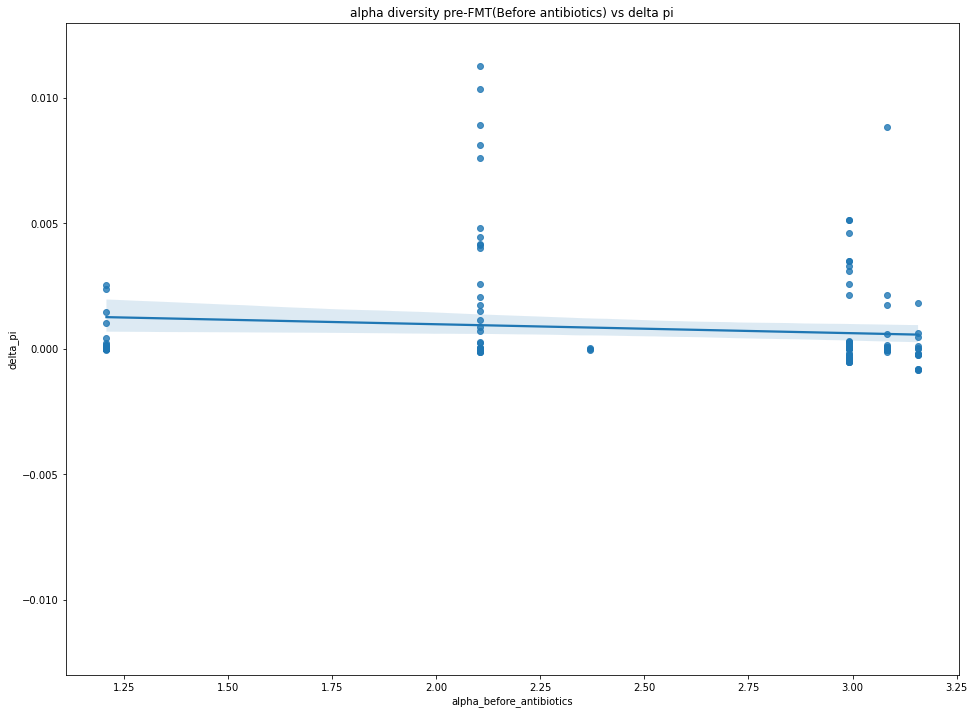

In [555]:
# categories = filtered_df['approx_wk'].sort_values().unique()
colors = sns.color_palette(palette='tab20b')  # list your colors here
#color_map = dict(zip(categories, colors))

ax = plt.subplots(figsize=(16, 12))

# for category in categories:
#     df_category = filtered_df[filtered_df['approx_wk'] == category]
#     ax.scatter(x=df_category['alpha_after_antibiotics'], y=df_category['delta_pi'], 
#                color=color_map[category], label=category)
    
# sns.regplot(x = "alpha_before_antibiotics",
#             y = "delta_pi",
#             data = final_df)
#sns.regplot(data=filtered_df, x='approx_wk', y='alpha_after_antibiotics', label=category, scatter_kws={'s': 50}, line_kws={'lw': 2}, truncate=False)



# ax=sns.lmplot(x="alpha_before_antibiotics", y="delta_pi", hue= 'approx_wk',data=filtered_df, height=12, aspect=1.5);

ax = sns.regplot(data=filtered_df, x=filtered_df.alpha_before_antibiotics, y=filtered_df.delta_pi)

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=filtered_df['alpha_before_antibiotics'], y=filtered_df['delta_pi'])

#display slope and intercept of regression equation
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r**2)
print("P-value:", p)
print("Standard Error:", sterr)
plt.ylim(-0.013, 0.013)
plt.xlabel('alpha_before_antibiotics')
plt.ylabel('delta_pi')
# plt.legend(title='Categories',loc='upper left')
plt.title('alpha diversity pre-FMT(Before antibiotics) vs delta pi')
plt.show()